 <h1><b>Objective of this notebook:</b></h1><br />
 To cartoonify the image uploaded by the user using python packages.

<h3>Importing required packages</h3>

In [1]:
# For image processing
import cv2

# For opening the filebox
import easygui

# For storing the image
import numpy as np

# For reading the image stored at particular path
import imageio

# For interacting with the underlying operating system
import os
import sys

# For creating static, animated and interactive visualizations
import matplotlib.pyplot as plt

# For creating graphical user interfaces
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox

# For opening, manipulating and saving many different image file formats
from PIL import ImageTk, Image

<h3>User defined functions</h3>

In [2]:
# Creating user defined function to upload the image to be cartoonified
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)
    
# ----------------------------------------------------------------------------------------------------#

# Creating user defined function to cartoonify the image uploaded by the user 
def cartoonify(ImagePath):
    
    # Reading the image uploaded by the user
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    ReSized1 = cv2.resize(originalmage, (960, 540))

    if (originalmage is not None):
        grayScaleImage = cv2.cvtColor(originalmage,  cv2.COLOR_BGR2GRAY)
        ReSized2 = cv2.resize(grayScaleImage, (960, 540))
        
    elif originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    

    # Smoothening the grayscale image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    
    # Retrieving the edges of the image
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (960, 540))
    
    # Preparing Mask Image
    colorImage = cv2.bilateralFilter(originalmage, 8, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    
    # Giving a Cartoon Effect
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    
    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1,
                                                                                                         wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    # Displaying the result images
    plt.show()
    

# --------------------------------------------------------------------------------------------------#

# Creating user defined function to ......
def save(ReSized6, ImagePath):
    
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved as " + newName +" at "+ path
    messagebox.showinfo(title=None, message=I)

<h3>Creating the User Interface Window</h3>

In [3]:
# Creating a tkinter object to call the modules
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify your Image')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

In [4]:
# Making the Cartoonify button in the main window
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

<h3>Code Execution</h3>

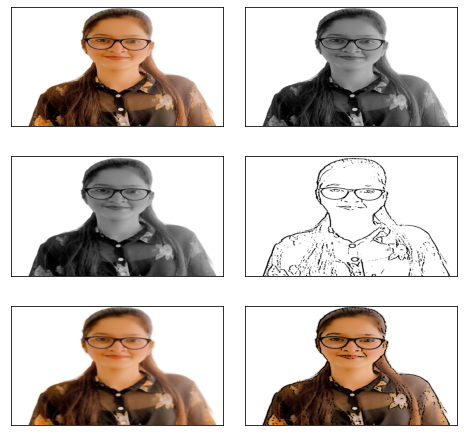

In [ ]:
# Calling the function to run the tkinter event and update the user interface
top.mainloop()